In [2]:
import datetime
import matplotlib.dates as mdates
import matplotlib.lines as lines
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime

In [72]:
def accumulate_per_day(input_data_frame,
                       name_of_date_column,
                       name_of_filtering_column):
    
    result_df = pd.DataFrame(columns=['Day', 'Count'])

    # set index to be current datettime
    input_data_frame.index = pd.to_datetime(
        input_data_frame[name_of_filtering_column], errors='coerce', format='%m/%d/%Y')
    input_data_frame.sort_index()

    current_day = 0
    current_day_count_acc = 0
    previous_day_count_acc = 0

    # Now we will iterate through all the rows accumulating existing counts
    # for the current given day.
    print("Please wait, it may take up to a minute to analyse the data")
    for (index, row) in input_data_frame.iterrows():

        # Get the first count for a set of rows belonging to the current day.
        report_as_of = row[name_of_date_column]
        first_daily_count_acc = row[name_of_filtering_column]

        # Convert date from string to datetime.
        current_day_read = (pd.to_datetime(report_as_of, errors='coerce') -
                            datetime.datetime(1970, 1, 1)).days

        if current_day_read == current_day:

            # We accumulate count from current day from different region and county,
            # if the day has not change.
            current_day_count_acc += first_daily_count_acc

        else:

            # If the day has changed, but not not first the first time
            if current_day != 0:

                # Create new entry in the accumulative data frame.
                new_row = {'Day': current_day,
                           'Count': current_day_count_acc - previous_day_count_acc}
                result_df = result_df.append(new_row, ignore_index = True)

                # Remember this day's accumulative count as previous day's accumulative count/
                previous_day_count_acc = current_day_count_acc

            # We switch to new day
            current_day = current_day_read
            current_day_count_acc = 0

    # Deal with the last row.
    new_row = {'Day': current_day,
               'Count': current_day_count_acc - previous_day_count_acc}
    result_df = result_df.append(new_row, ignore_index = True)

    return result_df

def accumulate_per_day2(input_data_frame,
                       name_of_date_column,
                       name_of_filtering_column):
    
    result_df = pd.DataFrame(columns=['Day', 'Count'])

    # set index to be current datettime
    input_data_frame.index = pd.to_datetime(
        input_data_frame[name_of_filtering_column], errors='coerce', format='%m/%d/%Y')
    input_data_frame.sort_index()

    # Now we will iterate through all the rows accumulating existing counts
    # for the current given day.
    print("Please wait, it may take up to a minute to analyse the data")
    for (index, row) in input_data_frame.iterrows():

        # Get the first count for a set of rows belonging to the current day.
        report_as_of = row[name_of_date_column]
        first_daily_count_acc = row[name_of_filtering_column]

        # Convert date from string to datetime.
        current_day_read = (pd.to_datetime(report_as_of, errors='coerce') -
                            datetime.datetime(1970, 1, 1)).days
        
        new_row = {'Day': current_day_read,
               'Count': first_daily_count_acc}
        result_df = result_df.append(new_row, ignore_index = True)

    return result_df

In [57]:
def filter_weekly(daily_df):
    
    result_df = pd.DataFrame(columns=['Week', 'Count'])
    week_day = 0
    week_count = 0
    current_count_per_day_acc = 0
    
    for (_, row) in daily_df.iterrows():

        week_day += 1
        current_count_per_day_acc += row.Count

        if week_day == 6:

            # The end of the week
            new_row = {'Week': week_count,
                       'Count': current_count_per_day_acc}

            # Let's add the data to the result for a finished week.
            result_df = result_df.append(new_row, ignore_index = True)
            current_count_per_day_acc = 0

            week_count += 1
            week_day = 0

    # Deal with the last row, if there is any data left over.
    if week_day != 0:
        new_row = {'Week': week_count,
                   'Count': current_count_per_day_acc}
        result_df = result_df.append(new_row, ignore_index = True)
    
    return result_df

In [58]:
###################################################################
# Collect data from CSV files stored in GITHUB                    #
####################################################################

covid_cases_df = pd.read_csv(
    'https://gist.githubusercontent.com/palles77/ba949ebb6c37bc9039fe56cdf401523d/raw/6b6845898cbdd2c445d4b3e839eba157c798b91a/newyork_covid_cases.csv')
covid_vaccines_df = pd.read_csv(
    'https://gist.githubusercontent.com/palles77/6f37b7df30f10267ed5fb278b9471ab0/raw/3567a37c991e934bb4c705e0cb5e8faa09ce093d/newyork_covid_vaccines.csv')

In [59]:
###################################################################
# Filter daily_df to weekly_df by collecting the sum of count in  #
# rows from daily_df every 7 days.                                #
###################################################################
covid_vaccines_daily_df = accumulate_per_day(covid_vaccines_df, 'Report as of', 'First Dose')

###################################################################
# Now let's print out the daily summary.                          #
###################################################################
for (index, row) in covid_vaccines_daily_df.iterrows():
    print(f"Current day = {row.Day}, count = {row.Count}")

Please wait, it may take up to a minute to analyse the data
Current day = 18610, count = 130
Current day = 18611, count = 1287
Current day = 18612, count = 4802
Current day = 18613, count = 6006
Current day = 18614, count = 8278
Current day = 18615, count = 4903
Current day = 18616, count = 2365
Current day = 18617, count = 6476
Current day = 18618, count = 11841
Current day = 18619, count = 18190
Current day = 18620, count = 16991
Current day = 18621, count = 3677
Current day = 18622, count = 5231
Current day = 18623, count = 5516
Current day = 18624, count = 15690
Current day = 18625, count = 21102
Current day = 18626, count = 27418
Current day = 18627, count = 27479
Current day = 18628, count = 7628
Current day = 18629, count = 27345
Current day = 18630, count = 6823
Current day = 18631, count = 19533
Current day = 18632, count = 29232
Current day = 18633, count = 43934
Current day = 18634, count = 55632
Current day = 18635, count = 54048
Current day = 18636, count = 25152
Current d

In [61]:
###################################################################
# Get weekly stats                                                #
###################################################################
weekly_vaccines_df = filter_weekly(covid_vaccines_daily_df)

###################################################################
# Now let's print out the weekly summary.                         #
###################################################################
for (index_filtered, row_filtered) in weekly_vaccines_df.iterrows():
    print(f"Current week = {row_filtered.Week}, count = {row_filtered.Count}")

Current week = 0, count = 25406
Current week = 1, count = 59540
Current week = 2, count = 102436
Current week = 3, count = 134495
Current week = 4, count = 228265
Current week = 5, count = 288152
Current week = 6, count = 305082
Current week = 7, count = 297453
Current week = 8, count = 209990
Current week = 9, count = 228034
Current week = 10, count = 248825
Current week = 11, count = 184850
Current week = 12, count = 472715
Current week = 13, count = 667162
Current week = 14, count = 646531
Current week = 15, count = 575714
Current week = 16, count = 552764
Current week = 17, count = 527424
Current week = 18, count = 634804
Current week = 19, count = 802460
Current week = 20, count = 567040
Current week = 21, count = 463386
Current week = 22, count = 428189
Current week = 23, count = 282505
Current week = 24, count = 233449
Current week = 25, count = 305664
Current week = 26, count = 376953
Current week = 27, count = 309708
Current week = 28, count = 182732
Current week = 29, count =

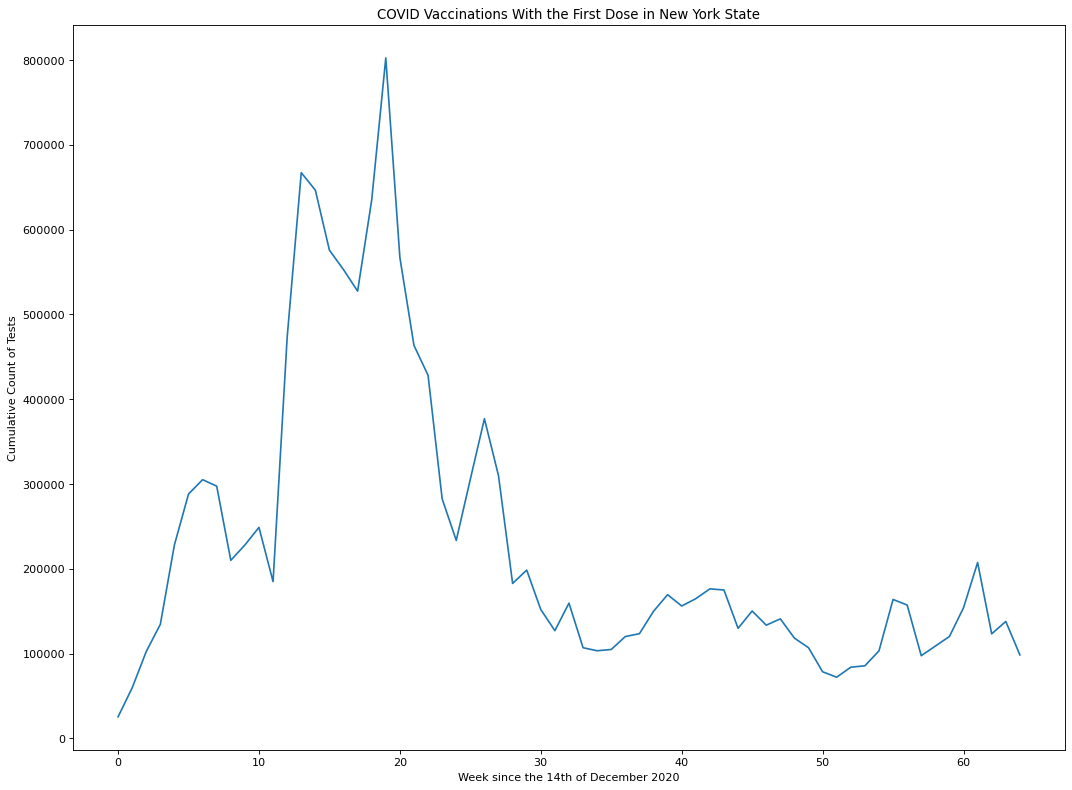

In [8]:
###################################################################
# Let's display weekly data.                                      #
###################################################################
figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.plot(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('COVID Vaccinations With the First Dose in New York State')
plt.xlabel('Week since the 14th of December 2020')
plt.ylabel('Cumulative Count of Tests')

plt.show()

In [9]:
# Zadania na 3.0
# 1. Wyświetlić wykres powyżej jako wykres słupkowy
# 2. Wyświetlić ilość pełnych zaszczepień (kolumna 'Series Complete' z covid_vaccines_df) tygodniowo 
#    jako wykres słupkowy w ilościach tygodniowych
# 3. Wyświetlić ilość nowych pozytywnych przypadków (kolumna 'Cumulative Number of Positives' z covid_cases_df)
#    jako wykres słupkowy w ilościach tygodniowych
# 4. Wyświetlić ilość testów (kolumna 'Cumulative Number of Tests Performed' z covid_cases_df)
#    jako wykres słupkowy w ilościach tygodniowych

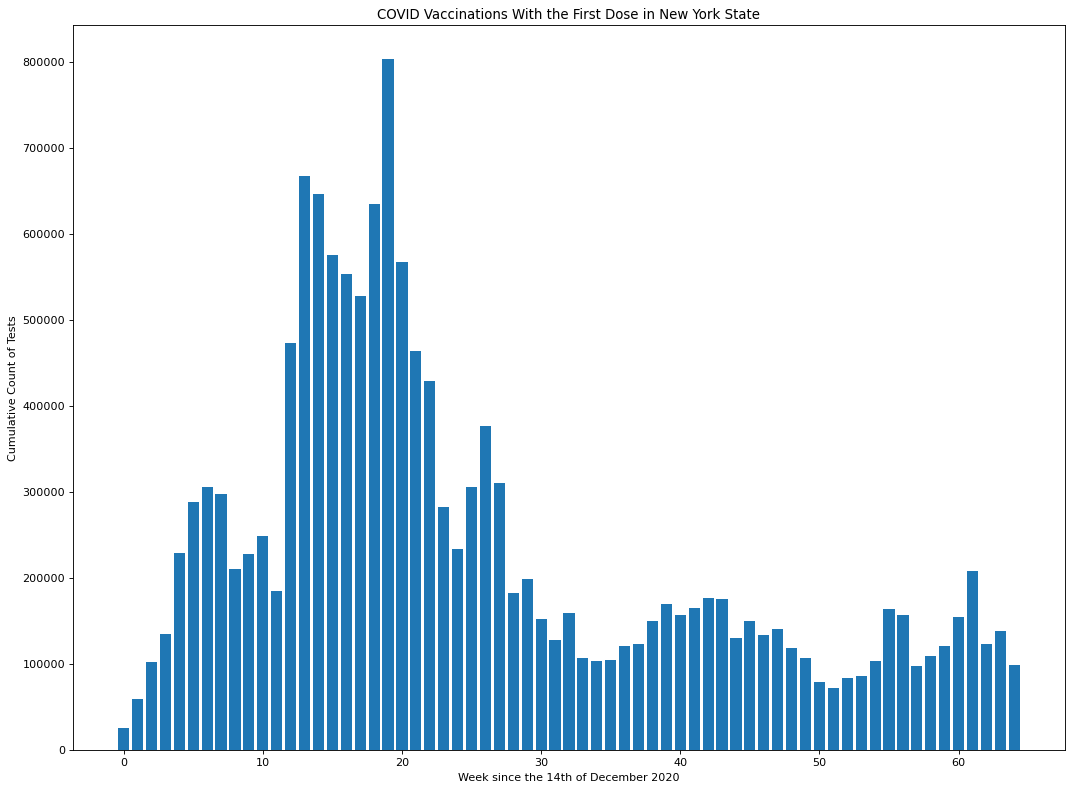

In [10]:
# Zadanie 1.
figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('COVID Vaccinations With the First Dose in New York State')
plt.xlabel('Week since the 14th of December 2020')
plt.ylabel('Cumulative Count of Tests')

plt.show()

Please wait, it may take up to a minute to analyse the data


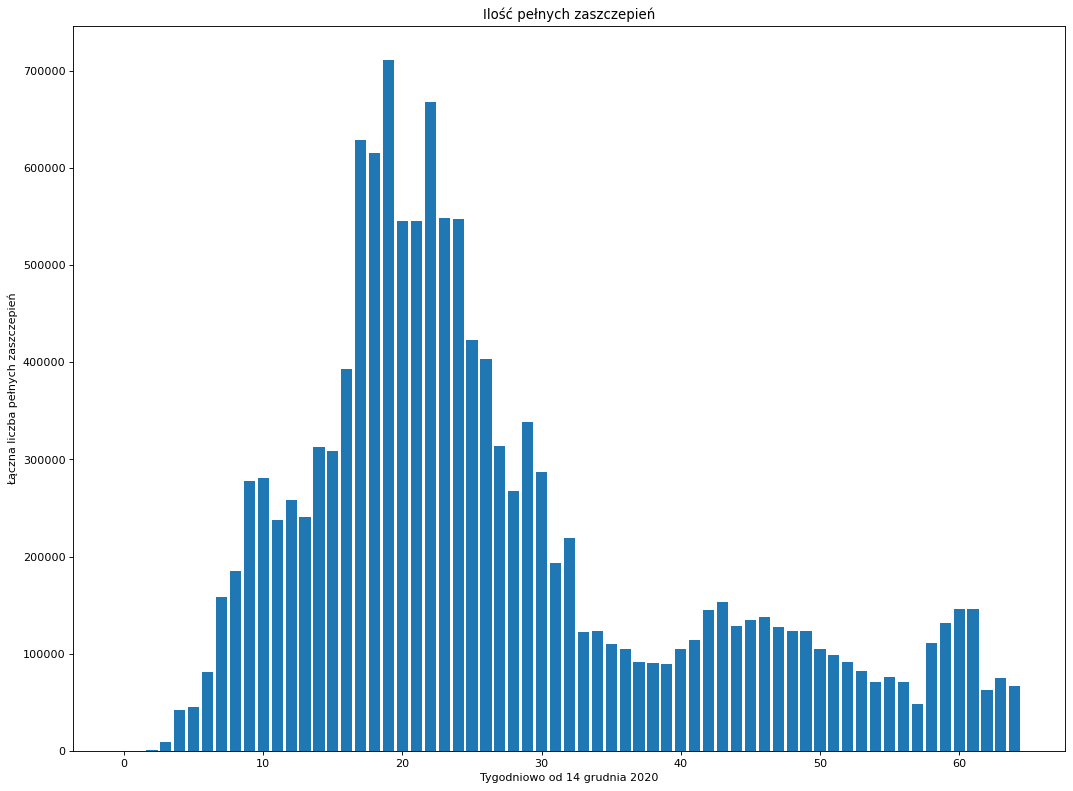

In [12]:
# Zadanie 2
covid_vaccines_daily_df = accumulate_per_day(covid_vaccines_df, 'Report as of', 'Series Complete')
weekly_vaccines_df = filter_weekly(covid_vaccines_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('Ilość pełnych zaszczepień')
plt.xlabel('Tygodniowo od 14 grudnia 2020')
plt.ylabel('Łączna liczba pełnych zaszczepień')

plt.show()

Please wait, it may take up to a minute to analyse the data


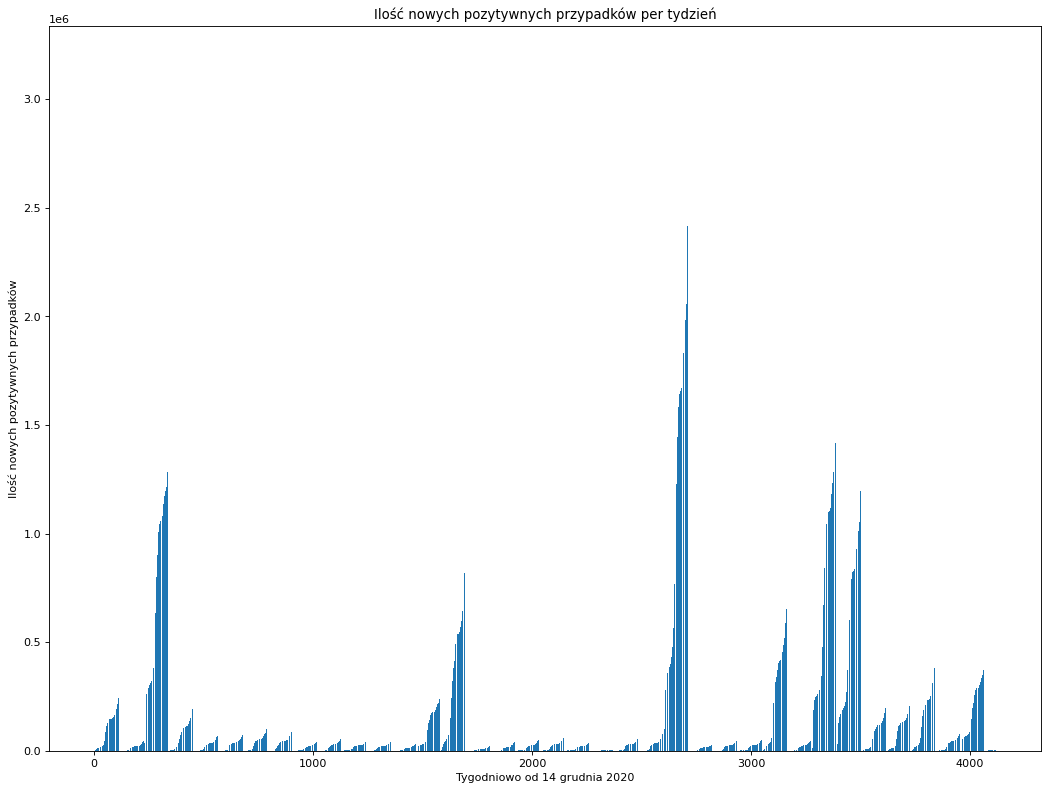

In [89]:
# Zadanie 3
covid_cases_daily_df = accumulate_per_day2(covid_cases_df, 'Test Date', 'Cumulative Number of Positives')
weekly_cases_df = filter_weekly(covid_cases_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_cases_df.iloc[0]
row_last = weekly_cases_df.iloc[len(weekly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_cases_df['Week'], weekly_cases_df['Count'])
plt.title('Ilość nowych pozytywnych przypadków per tydzień')
plt.xlabel('Tygodniowo od 14 grudnia 2020')
plt.ylabel('Ilość nowych pozytywnych przypadków')

plt.show()


Please wait, it may take up to a minute to analyse the data


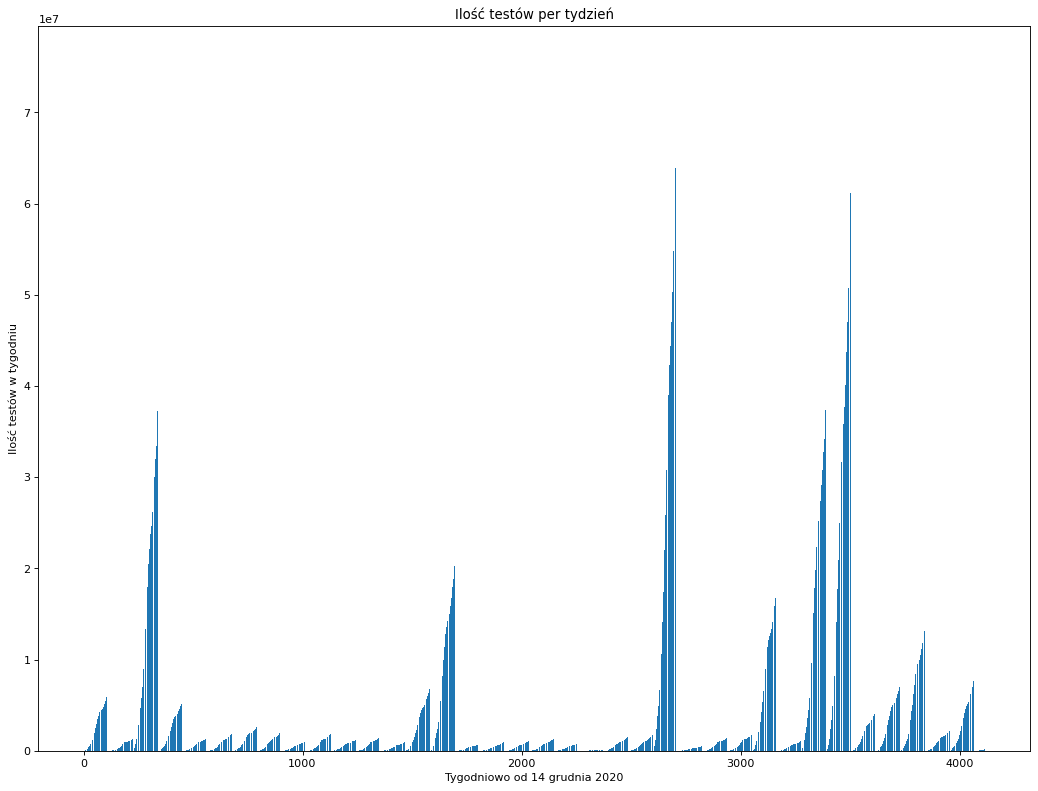

In [90]:
# Zadanie 4
covid_cases_daily_df = accumulate_per_day2(covid_cases_df, 'Test Date', 'Cumulative Number of Tests Performed')
weekly_cases_df = filter_weekly(covid_cases_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_cases_df.iloc[0]
row_last = weekly_cases_df.iloc[len(weekly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_cases_df['Week'], weekly_cases_df['Count'])
plt.title('Ilość testów per tydzień')
plt.xlabel('Tygodniowo od 14 grudnia 2020')
plt.ylabel('Ilość testów w tygodniu')

plt.show()

In [ ]:
# Zadania na 3.5
# 1. Wykonać wszystkie zadania na 3
# 2. Dodać nową funkcję monthly, która będzie filtrować dane dzienne co 30 dni.
# 3. Wyświetlić ilość pełnych zaszczepień (kolumna 'Series Complete' z covid_vaccines_df)
#    jako wykres słupkowy w ilościach miesięcznych.
# 4. Wyświetlić ilość nowych pozytywnych przypadków (kolumna 'Cumulative Number of Positives' z covid_cases_df)
#    jako wykres słupkowy w ilościach miesięcznych.
# 5. Wyświetlić ilość testów (kolumna 'Cumulative Number of Tests Performed' z covid_cases_df)
#    jako wykres słupkowy w ilościach miesięcznych.
        

In [91]:
#Zadanie 2
def filter_monthly(daily_df):
    
    result_df = pd.DataFrame(columns=['Month', 'Count'])
    month_day = 0
    month_count = 0
    current_count_per_day_acc = 0
    
    for (_, row) in daily_df.iterrows():

        month_day += 1
        current_count_per_day_acc += row.Count

        if month_day == 30:

            # The end of the week
            new_row = {'Month': month_count,
                       'Count': current_count_per_day_acc}

            # Let's add the data to the result for a finished week.
            result_df = result_df.append(new_row, ignore_index = True)
            current_count_per_day_acc = 0

            month_count += 1
            month_day = 0

    # Deal with the last row, if there is any data left over.
    if month_day != 0:
        new_row = {'Month': month_count,
                   'Count': current_count_per_day_acc}
        result_df = result_df.append(new_row, ignore_index = True)
    
    return result_df

Please wait, it may take up to a minute to analyse the data


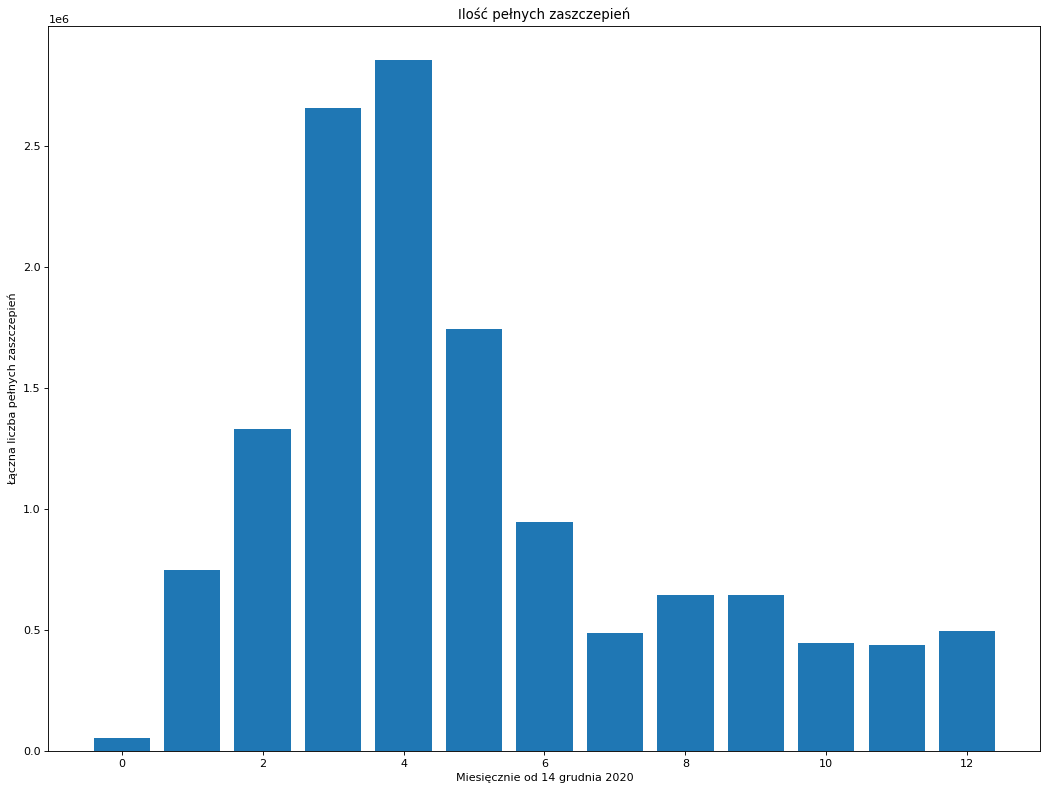

In [94]:
# Zadanie 3
covid_vaccines_daily_df = accumulate_per_day(covid_vaccines_df, 'Report as of', 'Series Complete')
monthly_vaccines_df = filter_monthly(covid_vaccines_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = monthly_vaccines_df.iloc[0]
row_last = monthly_vaccines_df.iloc[len(monthly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(monthly_vaccines_df['Month'], monthly_vaccines_df['Count'])
plt.title('Ilość pełnych zaszczepień')
plt.xlabel('Miesięcznie od 14 grudnia 2020')
plt.ylabel('Łączna liczba pełnych zaszczepień')

plt.show()

Please wait, it may take up to a minute to analyse the data


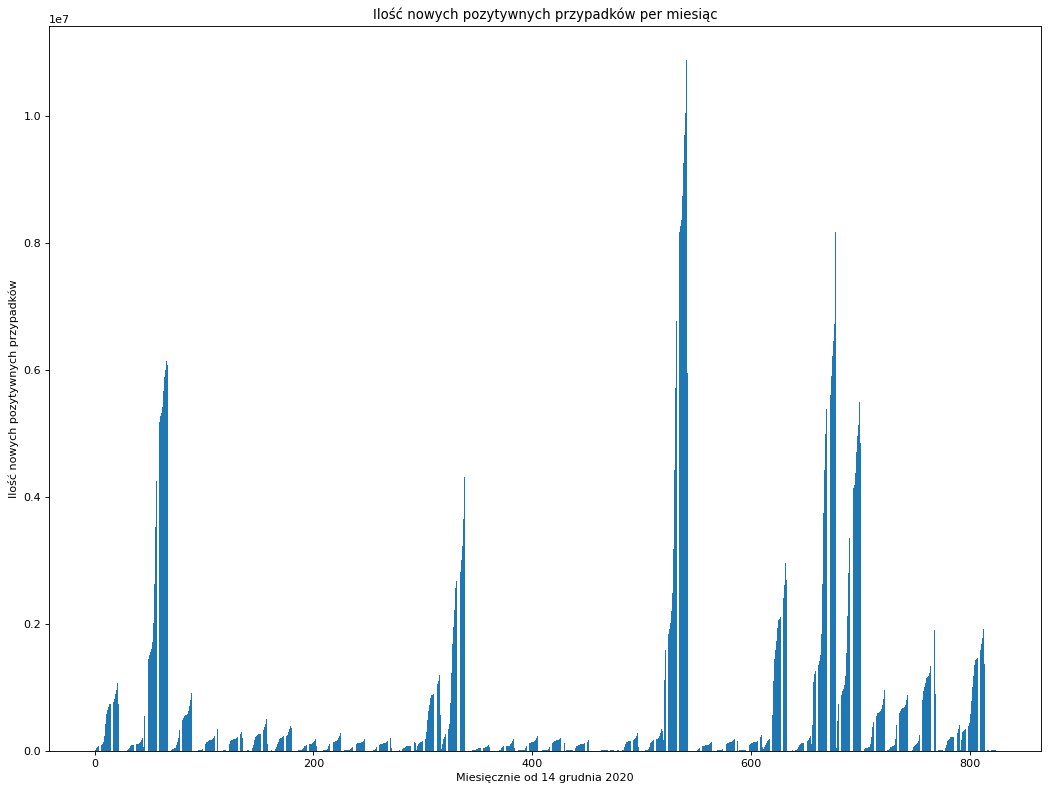

In [96]:
# Zadanie 4
covid_cases_daily_df = accumulate_per_day2(covid_cases_df, 'Test Date', 'Cumulative Number of Positives')
monthly_cases_df = filter_monthly(covid_cases_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = monthly_cases_df.iloc[0]
row_last = monthly_cases_df.iloc[len(monthly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(monthly_cases_df['Month'], monthly_cases_df['Count'])
plt.title('Ilość nowych pozytywnych przypadków per miesiąc')
plt.xlabel('Miesięcznie od 14 grudnia 2020')
plt.ylabel('Ilość nowych pozytywnych przypadków')

plt.show()

Please wait, it may take up to a minute to analyse the data


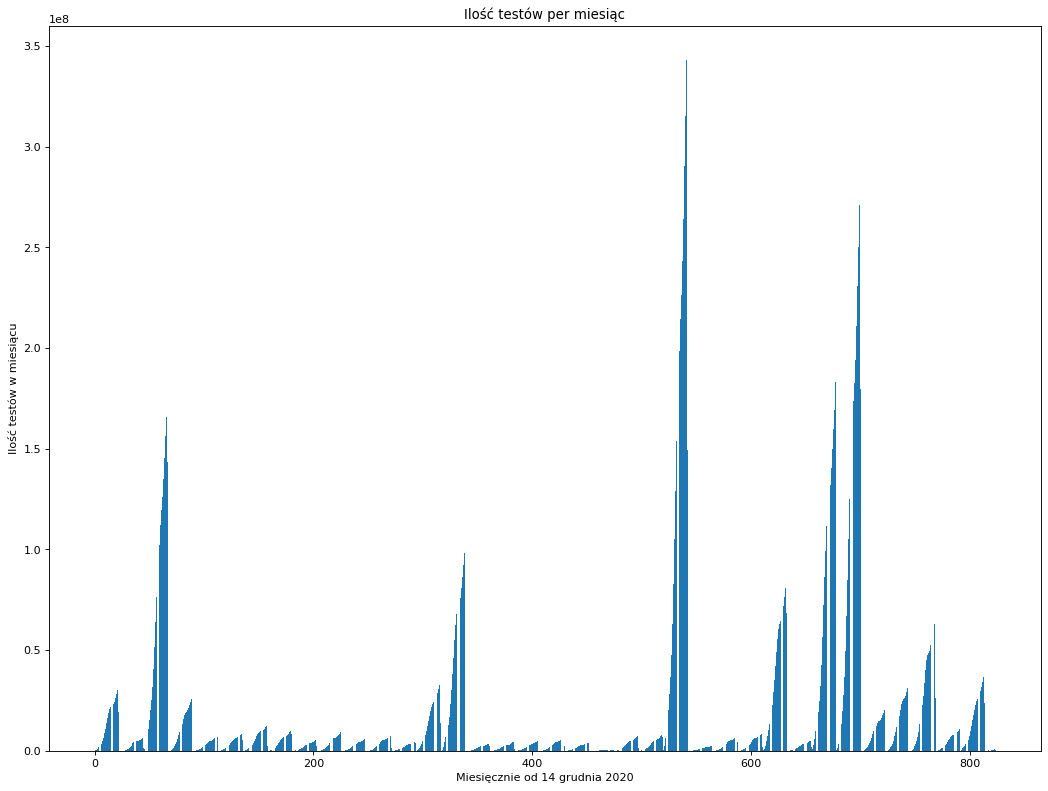

In [97]:
# Zadanie 5
covid_cases_daily_df = accumulate_per_day2(covid_cases_df, 'Test Date', 'Cumulative Number of Tests Performed')
month_cases_df = filter_monthly(covid_cases_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = month_cases_df.iloc[0]
row_last = month_cases_df.iloc[len(month_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(month_cases_df['Month'], month_cases_df['Count'])
plt.title('Ilość testów per miesiąc')
plt.xlabel('Miesięcznie od 14 grudnia 2020')
plt.ylabel('Ilość testów w miesiącu')

plt.show()

In [101]:
# Zadania na 4.0 dla stanu California
# 1. Wykonać wszystkie zadania na 3.5
# 2. Dodać nową funkcję california_daily_df, która będzie działać dla kolmumn 'cumulative_cases', 'cumuluative_deaths',
#    'cumulative_total_tests', 'cumulative_positive_tests', 'cumulative_reported_cases'
# 3. Wyświetlić dane tygodniowe dla: ilości zgonów, ilości wykonanych pozytywnych testów, ilości pozytywnych przypadków.
#    Należy pamiętać, że dane w tych kolumnach podobnie jak w przypadku danych dla Nowego Jorku są podawane w sposób
#    akumulacyjny i sposób ich obliczania powinien być taki sam jak dla Nowego Jorku.
california_df = pd.read_csv('https://gist.githubusercontent.com/palles77/33af6db4c1c9f0354814e18484e1707a/raw/ec403188428c5adcc597723157c99892d2d8014e/california_tests') 


In [150]:
# Zad 2
def california_daily_df(input_data_frame,
                       name_of_date_column,
                       name_of_filtering_column):
    
    result_df = pd.DataFrame(columns=['Day', 'Count'])

    # set index to be current datettime
    input_data_frame.index = pd.to_datetime(
        input_data_frame[name_of_filtering_column], errors='coerce', format='%Y-%m-%d')
    input_data_frame.sort_index()

    current_day = 0
    current_day_count_acc = 0
    previous_day_count_acc = 0

    # Now we will iterate through all the rows accumulating existing counts
    # for the current given day.
    print("Please wait, it may take up to a minute to analyse the data")

    for (index, row) in input_data_frame.iterrows():

        # Get the first count for a set of rows belonging to the current day.
        report_as_of = row[name_of_date_column]
        first_daily_count_acc = row[name_of_filtering_column]

        # Convert date from string to datetime.
        current_day_read = (pd.to_datetime(report_as_of, errors='coerce') -
                            datetime.datetime(1970, 1, 1)).days
        if current_day_read != 0:

            # Create new entry in the accumulative data frame.
            new_row = {'Day': current_day_read,
                       'Count': (first_daily_count_acc - previous_day_count_acc) if (first_daily_count_acc - previous_day_count_acc) > 0 else 0}
            result_df = result_df.append(new_row, ignore_index = True)

            # Remember this day's accumulative count as previous day's accumulative count/
            previous_day_count_acc = first_daily_count_acc
    df.drop(result_df.tail(1).index,inplace=True) # drop last n rows
    return result_df

Please wait, it may take up to a minute to analyse the data


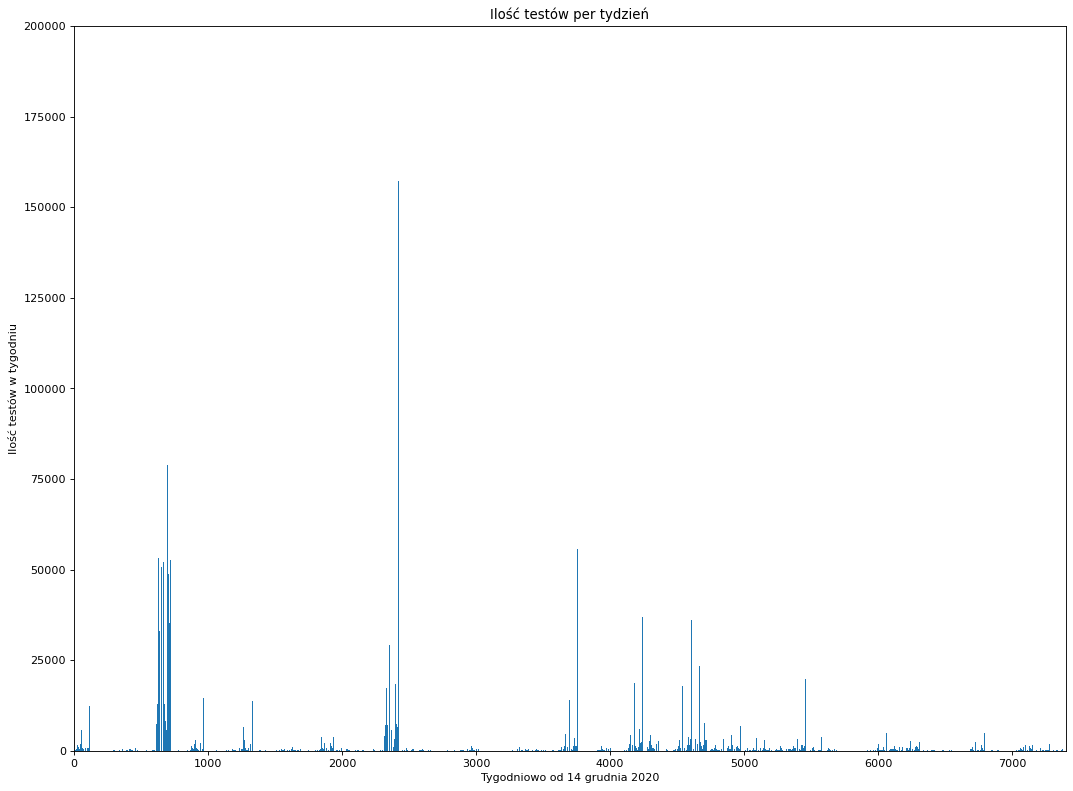

In [157]:
# Zadanie 3
df = california_daily_df(california_df, 'date', 'cumulative_cases')
weekly_cases_df = filter_weekly(df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_cases_df.iloc[0]
row_last = weekly_cases_df.iloc[len(weekly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_cases_df['Week'], weekly_cases_df['Count'])
plt.title('Ilość testów per tydzień')
plt.xlabel('Tydzień')
plt.ylabel('Ilość testów w tygodniu')
ax = plt.gca()
ax.set_xlim([0, 7401])
ax.set_ylim([0, 200000])

plt.show()

Please wait, it may take up to a minute to analyse the data


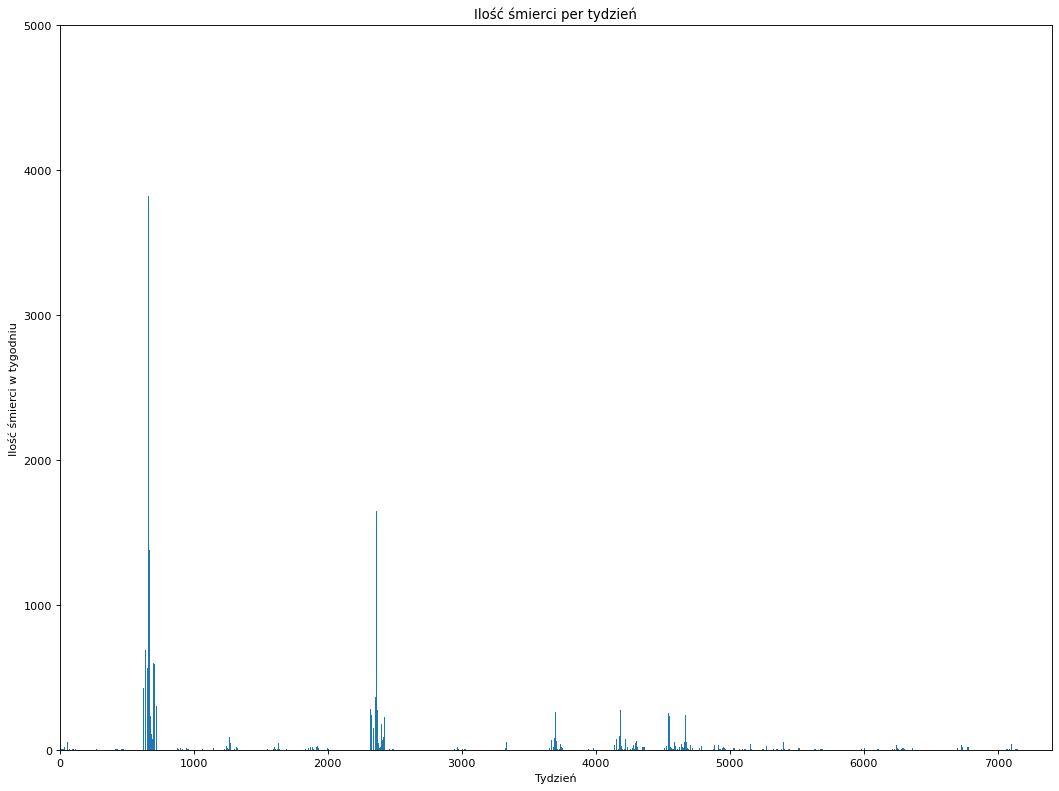

In [163]:
# Zadanie 3
df = california_daily_df(california_df, 'date', 'cumulative_deaths')
weekly_cases_df = filter_weekly(df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_cases_df.iloc[0]
row_last = weekly_cases_df.iloc[len(weekly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_cases_df['Week'], weekly_cases_df['Count'])
plt.title('Ilość śmierci per tydzień')
plt.xlabel('Tydzień')
plt.ylabel('Ilość śmierci w tygodniu')
ax = plt.gca()
ax.set_xlim([0, 7401])
ax.set_ylim([0, 5000])

plt.show()

Please wait, it may take up to a minute to analyse the data


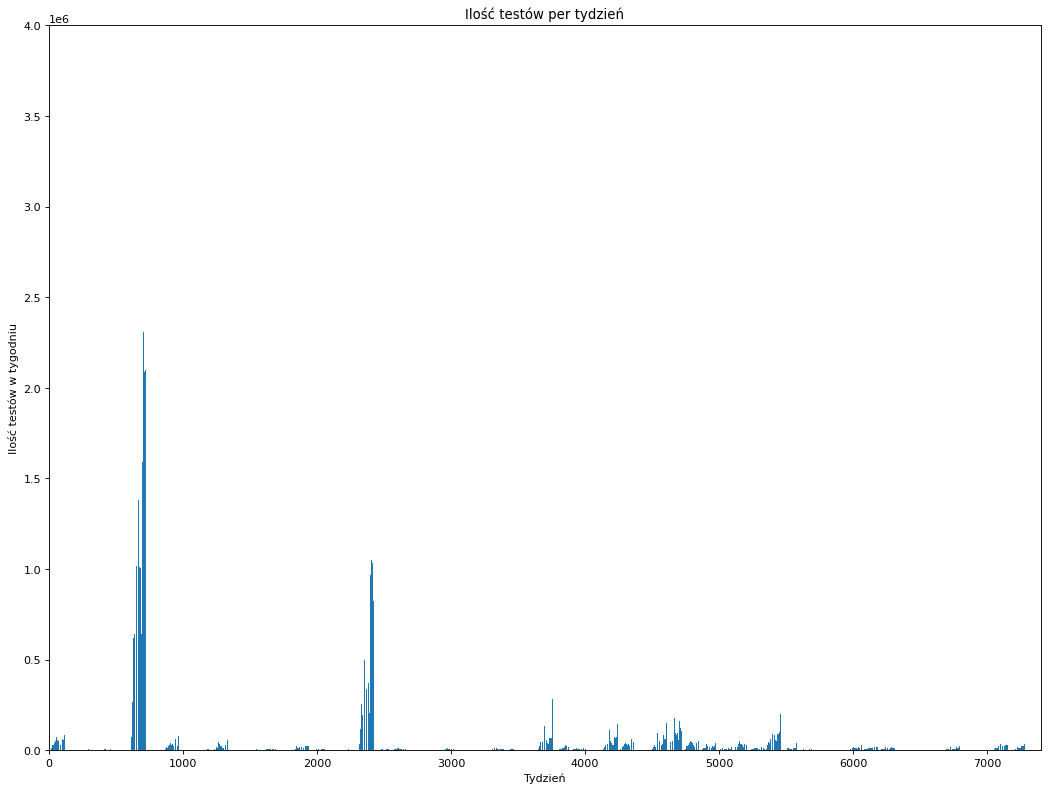

In [166]:
# Zadanie 3
df = california_daily_df(california_df, 'date', 'cumulative_total_tests')
weekly_cases_df = filter_weekly(df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_cases_df.iloc[0]
row_last = weekly_cases_df.iloc[len(weekly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_cases_df['Week'], weekly_cases_df['Count'])
plt.title('Ilość testów per tydzień')
plt.xlabel('Tydzień')
plt.ylabel('Ilość testów w tygodniu')
ax = plt.gca()
ax.set_xlim([0, 7401])
ax.set_ylim([0, 4000000])

plt.show()

Please wait, it may take up to a minute to analyse the data


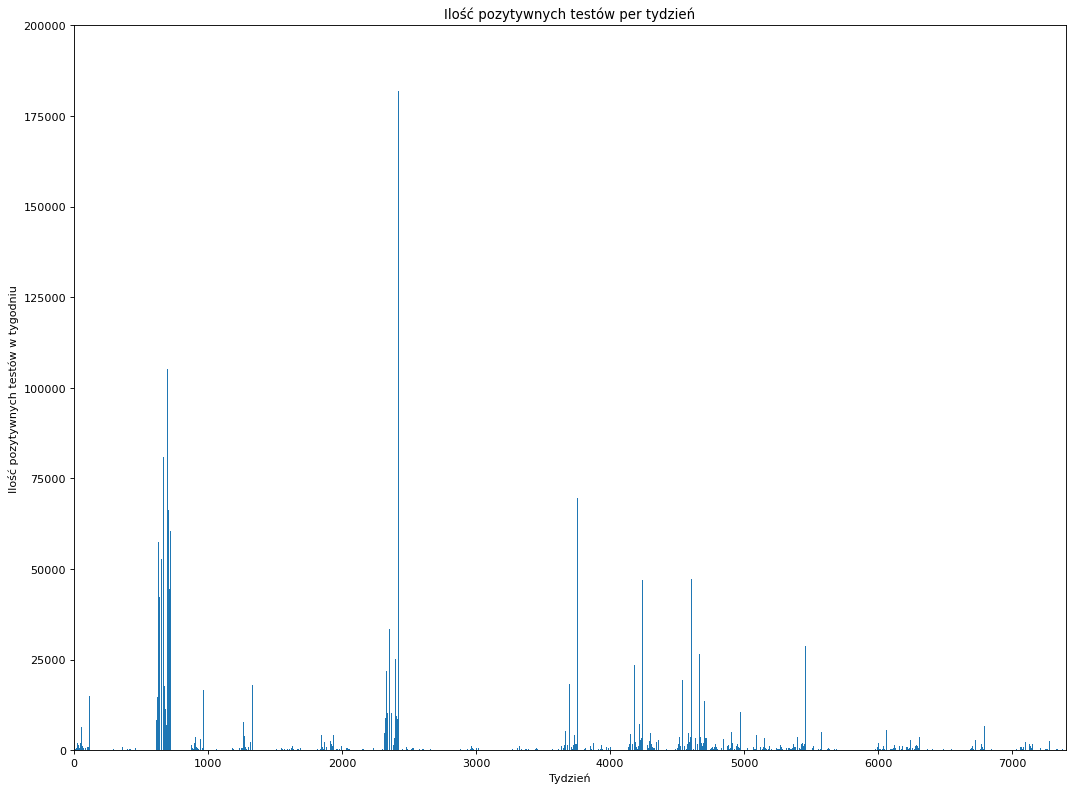

In [172]:
# Zadanie 3
df = california_daily_df(california_df, 'date', 'cumulative_positive_tests')
weekly_cases_df = filter_weekly(df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_cases_df.iloc[0]
row_last = weekly_cases_df.iloc[len(weekly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_cases_df['Week'], weekly_cases_df['Count'])
plt.title('Ilość pozytywnych testów per tydzień')
plt.xlabel('Tydzień')
plt.ylabel('Ilość pozytywnych testów w tygodniu')
ax = plt.gca()
ax.set_xlim([0, 7401])
ax.set_ylim([0, 200000])

plt.show()

Please wait, it may take up to a minute to analyse the data


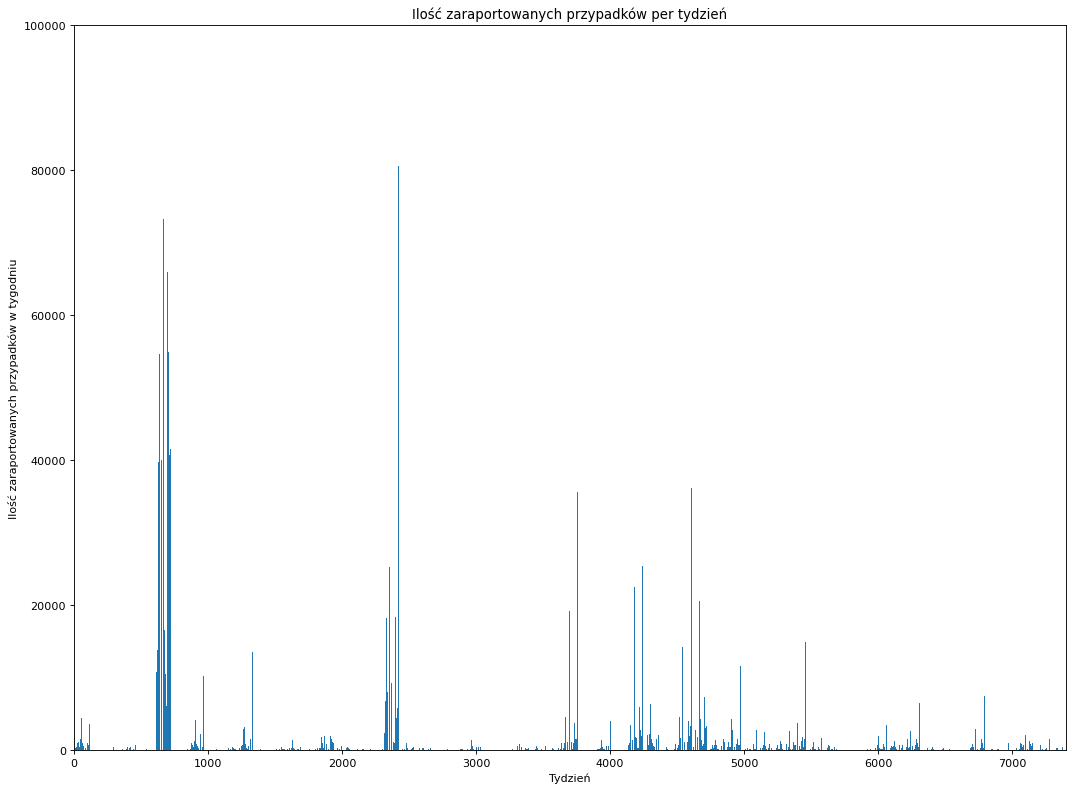

In [175]:
# Zadanie 3
df = california_daily_df(california_df, 'date', 'cumulative_reported_cases')
weekly_cases_df = filter_weekly(df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_cases_df.iloc[0]
row_last = weekly_cases_df.iloc[len(weekly_cases_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_cases_df['Week'], weekly_cases_df['Count'])
plt.title('Ilość zaraportowanych przypadków per tydzień')
plt.xlabel('Tydzień')
plt.ylabel('Ilość zaraportowanych przypadków w tygodniu')
ax = plt.gca()
ax.set_xlim([0, 7401])
ax.set_ylim([0, 100000])

plt.show()